In [1]:
import math
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # для работы со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

# Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого

In [2]:
sigma = 15  # Стандартное отклонение
Z = stats.norm.ppf(0.95)  #  % Квантиль нормального распределения. 
Delta = 3  # Погрешность

N = round(((sigma * Z) / Delta) ** 2)
print(f'Минимально необходимый объем выборки: {N}')

Минимально необходимый объем выборки: 68


# Задание № 1

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [3]:
n = 25
x = 130
std = 15
disp = 0.02
z = stats.norm.ppf(0.98)

accuracy = (std / math.sqrt(n)) * z
CI_left = 130 - accuracy
CI_right = 130 + accuracy

L = round(CI_right - CI_left)
print(f'Длина полученного доверительного интервала: {L}')

Длина полученного доверительного интервала: 12


# Задание № 2

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально

In [4]:
np.random.seed(99) #фиксация случайности

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

# В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия
α = 0.002
t, p_value = stats.ttest_ind(population_men, population_women) #Критерий Стьюдента (t-test)
print(p_value)
print(t)

if p_value < α:
    print('Различия незначительны')
else:
    print('Различия значительны')

0.02962765741379924
2.1750330978778973
Различия значительны


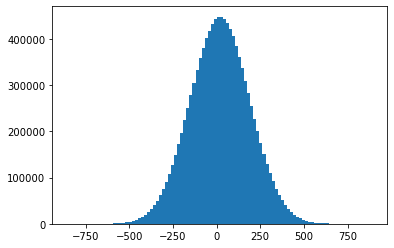

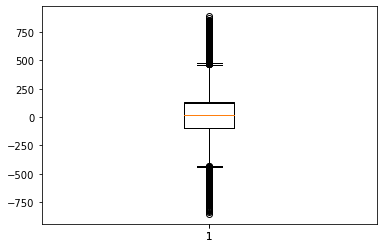

In [5]:
plt.hist(population_men, bins=100); #Выборка mens
plt.hist(population_women, bins=100);  #Выборка womens
plt.show()
plt.boxplot(population_men);
plt.boxplot(population_women);

# Задание № 3

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.

In [6]:
sigma = 150  # Стандартное отклонение
Z = stats.norm.ppf(0.95)  #  % Квантиль нормального распределения. 
Delta = 50  # Погрешность

N = round(((sigma * Z) / Delta) ** 2)
print(f'Минимально необходимый объем выборки: {N}')

Минимально необходимый объем выборки: 24


# Задание № 4

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта


oddsratio, p_value = stats.fisher_exact(observations) # Возможно пригодится эта функция.
oddsratio, p_value

(0.5811965811965812, 0.35417955365927367)

p_value = 0.35417955365927367 при уровне значимости $\alpha=0.05$, принимается нулевая гипотеза

# Задание № 5

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

In [9]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


# Задание № 6

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.

In [10]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]\

α = 0.05
t, p_value = stats.ttest_ind(data_1, data_2)

if p_value < α:
    print('Выборки принадлежат одному множеству')
else:
    print('Выборки не принадлежат одному множеству')

Выборки принадлежат одному множеству


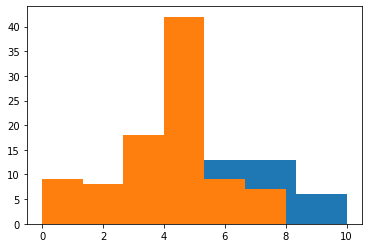

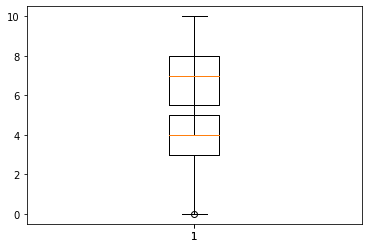

In [11]:
plt.hist(data_1, bins=6); #Выборка B
plt.hist(data_2, bins=6);  #Выборка A
plt.show()
plt.boxplot(data_1);
plt.boxplot(data_2);

# Задание № 7 (задание без подвоха)

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [12]:
#H0 - распределение нормальное
#H1 - распределение ненормальное
p_value = 0.03
α = 0.05 #пусть так, я решила, что цена ошибки не велика)

if p_value < α:
    print('Отвергаем H0')
else:
    print('Не отвергаем H0 - распределение нормальное')

Отвергаем H0


# Задание № 8
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [13]:
np.random.seed(99) #фиксация случайности

A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

α = 0.05
stat, p_value = stats.ttest_rel(A,B)
print(p_value)

#H0 - различий нет
#H1 - различия есть
if p_value < α:
    print('Отвергаем H0')
else:
    print('Не отвергаем H0 - различий нет')

0.10875223988971396
Не отвергаем H0 - различий нет


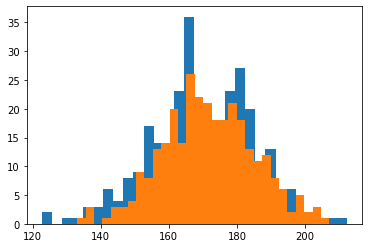

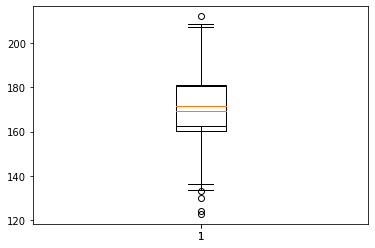

In [14]:
plt.hist(A, bins=30); #Выборка B
plt.hist(B, bins=30);  #Выборка A
plt.show()
plt.boxplot(A);
plt.boxplot(B);

При p = α, думаю, уже можно было бы говорить о значимом различии или неоднозначности и нужны еще тесты